# 1
## (1)

<img style="transform: rotate(-0deg); width:500px" src="./HW1_1.jpg" alt="sieve shaker" title="Title text" />

## (2)

Firstly, we get:
$$
W_1 = 
\begin{bmatrix}
    w_{111}& w_{112}\\
    w_{121}& w_{122}\\
    w_{131}& w_{132}
\end{bmatrix}
$$

$$
W_2 = 
\begin{bmatrix}
    w_{211}& w_{212}&w_{213}\\
    w_{221}& w_{222}&w_{223}
\end{bmatrix}
$$

$$
V = 
\begin{bmatrix}
    v_{11}& v_{12}\\
    v_{21}& v_{22}\\
    v_{31}& v_{32}
\end{bmatrix}
$$

$$
b_1 = 
\begin{bmatrix}
    b_{111}\\
    b_{121}\\
    b_{131}
\end{bmatrix}
$$

$$
b_2 = 
\begin{bmatrix}
    b_{211}\\
    b_{221}
\end{bmatrix}
$$

$$
c = 
\begin{bmatrix}
    c_{11}\\
    c_{21}\\
    c_{31}
\end{bmatrix}
$$

With an input:

$$
X = 
\begin{bmatrix}
    x_{11}& x_{12}&x_{13}\\
    x_{21}& x_{22}&x_{23}
\end{bmatrix}
$$,

we get the first hidden layer $h_1 = Relu(w_1 x +b_1)$ and second hidden layer $h_2 = Relu(w_2 h_1 +b_2)$.

Finally the output is a $3*3$ matrix $y = Softmax(V h_2 +c)$.

In [3]:
import numpy as np

# ReLu Function
relu = np.vectorize(lambda z: np.fmax(0,z))

# Softmax Function
def softmax(x):
    return np.exp(x)/(np.exp(x).sum(axis=0))

def ff_nn_2_ReLu(x,W1,W2,V,b1,b2,c):
    a1 = np.dot(W1,x) + b1
    h1 = relu(a1)
    a2 = np.dot(W2,h1) + b2
    h2 = relu(a2)
    a3 = np.dot(V,h2) + c
    y = softmax(a3)
    return y

## (4)

In [14]:
X = np.array([[1,0,0],[-1,-1,1]])
W1 = np.array([[1,0],[-1,0],[0,.5]])
W2 = np.array([[1,0,0],[-1,-1,0]])
V = np.array([[1,1],[0,0],[-1,-1]])
b1 = np.array([[0],[0],[1]])
b2 = np.array([[1],[-1]])
c = np.array([[1],[0],[0]])

y = ff_nn_2_ReLu(X,W1,W2,V,b1,b2,c)
print('y: ', y.round(4))

y:  [[0.9465 0.8438 0.8438]
 [0.0471 0.1142 0.1142]
 [0.0064 0.042  0.042 ]]


# 2
## (1)

$$
\frac{\partial f(x,y)}{\partial x} = -400xy + 400x^3+2x-2\\
\frac{\partial f(x,y)}{\partial x} = 200y-200x^2
$$

## (2)

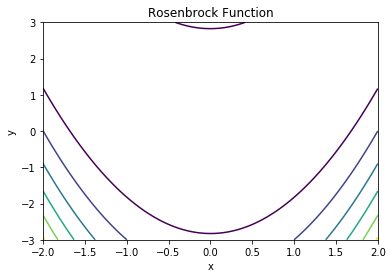

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#Plot of Rosenbrock's banana function: f(x,y)=(1-x)^2+100(y-x^2)^2

rosenbrockfunction = lambda x,y: (1-x)**2+100*(y-x**2)**2

n = 100 
m = 100
a=-2; b=2
c=-3; d=3

X,Y = np.meshgrid(np.linspace(a,b,n), np.linspace(c,d,m))

Z = rosenbrockfunction(X,Y)

plt.contour(X,Y,Z)
plt.title('Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## (3)

In [18]:
def grad_f(vector):
    x, y = vector
    df_dx = -400 * x * y + 400 * (x ** 3) + 2 * x - 2
    df_dy = 200 * y - 200 * x **2
    
    return np.array([df_dx, df_dy])

In [29]:
def grad_descent(starting_point=None, iterations=10, learning_rate=0.0005):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
        
    return np.array(trajectory)

C:\Users\hongx\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hongx\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


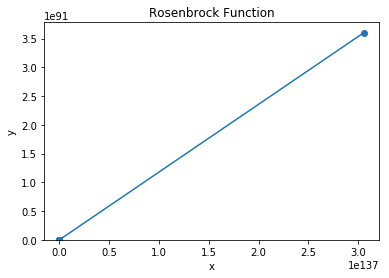

In [30]:
np.random.seed(10)
traj = grad_descent(iterations=50000, learning_rate=0.01)

plt.contour(X,Y,Z)
plt.title('Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

plt.show()

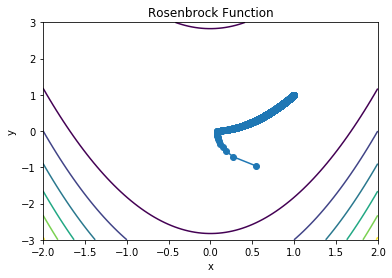

In [28]:
np.random.seed(10)
traj = grad_descent(iterations=50000, learning_rate=0.001)

plt.contour(X,Y,Z)
plt.title('Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

plt.show()

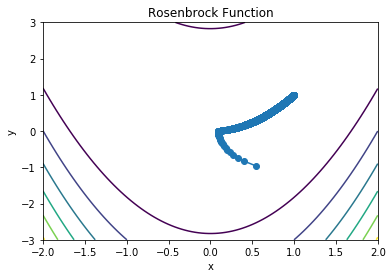

In [20]:
np.random.seed(10)
traj = grad_descent(iterations=50000)

plt.contour(X,Y,Z)
plt.title('Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

plt.show()

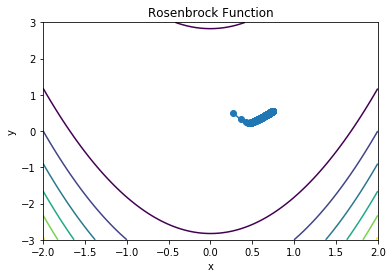

In [21]:
traj = grad_descent(iterations=500, learning_rate=0.002)

plt.contour(X,Y,Z)
plt.title('Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

plt.show()

The coordinate for the mimimum value of the Rosenbrock Function is $(-1,-1)$. The function is not convex and a larger learning rate will cause the trajectories to diverage. With the smaller learning rate, the pace for each iteration to approach the right answer is pretty slow.

## (4)

In [22]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

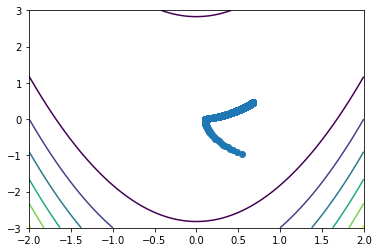

In [23]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=5000, epsilon=0.0002, alpha=0.005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

plt.show()

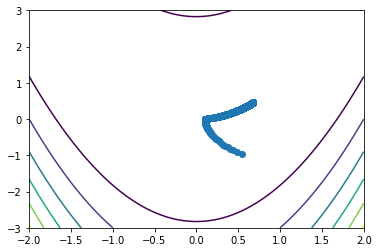

In [25]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=5000, epsilon=0.0002, alpha=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

plt.show()

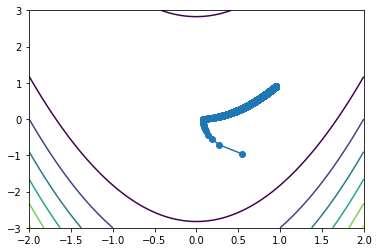

In [26]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=5000, epsilon=0.001, alpha=0.005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

plt.show()

C:\Users\hongx\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hongx\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hongx\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


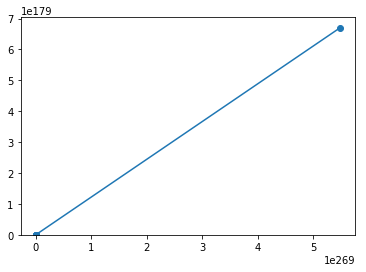

In [27]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=5000, epsilon=0.02, alpha=0.005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

plt.show()

According to the graphs above, we can say that the impact of epsilon is similar to learning rate in normal gradient descent. A larger epsilon will cause the trajectories to diverage, while,a small epsilon will make the pace for each iteration to approach the right answer is pretty slow.

# 3
## (1)

With a multi-class classification question, we need to use cross entropy as the loss funciton and there are 3 output, $y_1, y_2, y_3$:

$L(y, \hat{y}) = -(y_1log(\hat{y_1} +y_2log(\hat{y_2} +y_3log(\hat{y_3}))$

Besides, the network is same as the first question.The gradient of the Loss function with respect to each of the model parameters are as follows:

<img style="transform: rotate(-0deg); width:500px" src="./HW1_2.jpg" alt="sieve shaker" title="Title text" />

## (2)

In [96]:
def drelu(x):
    return np.where(x>0,1,0)

def forward(x,W1, b1,W2,b2,V,c):
    z1 = x@W1.T+b1.T
    a1  = relu(z1)
    z2  = a1@W2.T +b2.T
    a2 = relu(z2)
    z3 = a2@V.T+c.T
    a3 = np.apply_along_axis(softmax,1,z3)
    return z1,a1,z2,a2,z3,a3

def loss(y_hat, y):
    total = y*np.log(y_hat)
    return -total.sum()

In [97]:
def grad_f(x,W1,b1,W2,b2,V,c,ys):
    
    z1,a1,z2,a2,z3,y = forward(x,W1,b1,W2,b2,V,c)
    
    new_W1 = np.zeros((3,2))
    new_b1= np.zeros((3,1))
    new_W2 =np.zeros((2,3))
    new_b2 =np.zeros((2,1))
    new_V = np.zeros((3,2))
    new_c = np.zeros((3,1))
    
    for i in range(x.shape[0]):
        del3 = (y[i].reshape(3,1) - ys[i].reshape(3,1))
      
        new_c+= del3
        new_V +=  del3@a2[i].reshape(1,2)
        del2 = V.T@del3*drelu(z2[i].reshape(2,1))
        new_b2 += del2
        new_W2 += del2@a1[i].reshape(1,3)
        del1 = W2.T@del2*drelu(z1[i].reshape(3,1))
        new_b1 += del1
        new_W1 += del1@x[i].reshape(1,2)
    
    new_W1 /= x.shape[0]
    new_b1 /= x.shape[0]
    new_W2  /= x.shape[0]
    new_b2  /= x.shape[0]
    new_V  /= x.shape[0]
    new_c  /= x.shape[0]
    
    return [new_W1,new_b1,new_W2,new_b2,new_V,new_c,y]

## (3)

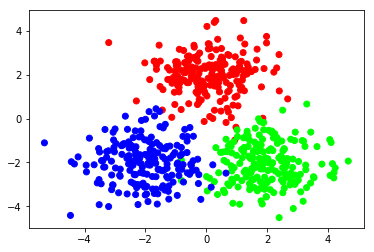

In [98]:
covm = [[1, 0], [0, 1]]
x1 = np.random.multivariate_normal(mean = [0, 2], cov=covm, size = 200)
x2 = np.random.multivariate_normal(mean = [2, -2], cov=covm, size = 200)
x3 = np.random.multivariate_normal(mean = [-2, -2], cov=covm, size = 200)
x = np.concatenate([x1,x2,x3])
y1 = np.array([[1,0,0] for i in range(200)])
y2 = np.array([[0,1,0] for i in range(200)])
y3 = np.array([[0,0,1] for i in range(200)])
y = np.concatenate([y1,y2,y3])
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

## (4)

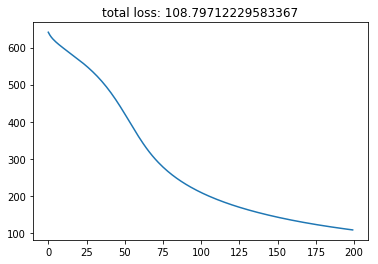

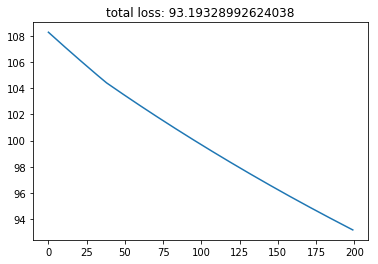

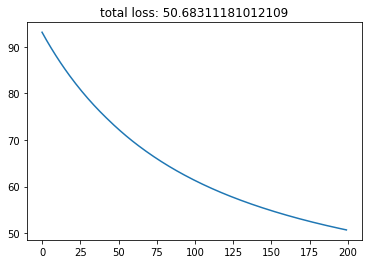

In [99]:
def gradient_descent(x,y,weights,iterations, learning_rate):
    losses = []
    for i in range(iterations):
        gradients = grad_f(x,*weights, y)
        losses.append(loss(gradients[-1],y))
        gradients = gradients[:-1]
        for j in range(len(weights)):
            weights[j]-= learning_rate*gradients[j]
    plt.plot(list(range(iterations)), losses)
    plt.title('total loss: '+str(losses[-1]))
    plt.show()

np.random.seed(10)
w1 =np.random.uniform(size =(3,2))
b1 = np.random.uniform(size = (3,1))
w2 = np.random.uniform(size =(2,3))
b2 = np.random.uniform(size = (2,1))
V =np.random.uniform(size =(3,2))
c =np.random.uniform(size = (3,1))
weights = [w1,b1,w2,b2,V,c]


gradient_descent(x,y,weights,200,0.05)
gradient_descent(x,y,weights,200,0.01)
gradient_descent(x,y,weights,200,0.1)

We can see that a larger learning rate will make the covergency of the loss faster.

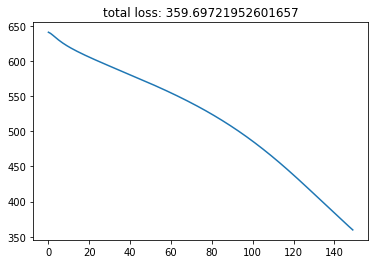

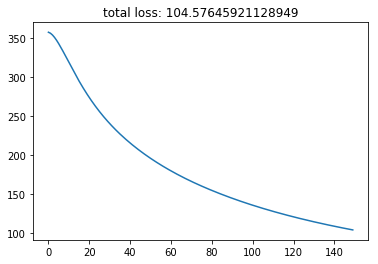

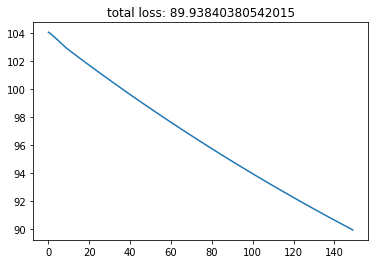

In [107]:
def gradient_descent_momentum(x,y,weights,iterations, learning_rate, momentum):
    losses = []
    ms= [np.zeros(i.shape) for i in weights]
    for i in range(iterations):
        gradients = grad_f(x,*weights,y)
        losses.append(loss(gradients[-1],y))
        gradients = gradients[:-1]
        
        for j in range(len(weights)):
            ms[j] = momentum*ms[j]+gradients[j]*learning_rate
            weights[j]-= ms[j]

    plt.plot(list(range(iterations)), losses)
    plt.title('total loss: '+str(losses[-1]))
    plt.show()

gradient_descent_momentum(x,y,weights,200, 0.01,0.5)
gradient_descent_momentum(x,y,weights,200, 0.01,0.8)
gradient_descent_momentum(x,y,weights,200, 0.01,0.3)

Comparing the plots using the Momentum method and the second plot in the question for the normal gradient descent, we can say that the Momentum method will converges more quickly if the momentum is chosen properly. In the experiment, 0.3 is the optimal.